In [3]:
import tensorflow.keras
import tensorflow as tf
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

GPU is available


In [4]:

print("Num GPUs available:", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs available: 1


In [5]:
import pandas as pd 
import numpy as np 
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import cv2 as cv

In [6]:
df=pd.read_csv(r'/Users/jatinkushwaha/Downloads/digit-recognizer/dataset.csv')
X = df.drop(columns=['label']) 
y = df['label']   

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def display_digit(pixel_row):
    image = np.array(pixel_row).reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

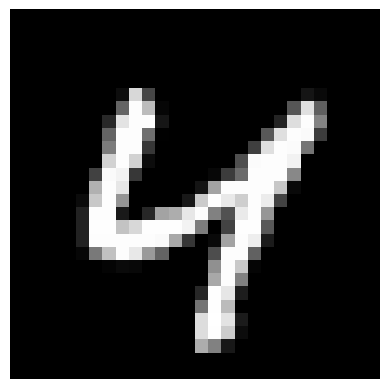

In [9]:
display_digit(X.iloc[888])


In [10]:
model=Sequential([
    Dense(units=128, activation='relu', input_shape=(784,)),  
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')
])

/Users/jatinkushwaha/My Files/PYTHON MAIN/venv-metal/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-05 20:36:50.564175: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-06-05 20:36:50.564200: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-06-05 20:36:50.564203: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-06-05 20:36:50.564499: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-05 20:36:50.564518: I tensorflow/core/common_runtime/pluggable_device/pluggable_devic

In [23]:
t0 = time.time()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=3000)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
t1 = time.time()
total = t1-t0
print(total)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9972 - loss: 0.0173
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9969 - loss: 0.0194
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9981 - loss: 0.0112
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9986 - loss: 0.0059
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9989 - loss: 0.0054
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9985 - loss: 0.0068
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9989 - loss: 0.0053
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9991 - loss: 0.0038
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9995 - loss: 0.0018  
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9991 - loss: 0.0032
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9671 - loss: 0.7134
Test Loss: 0.7261025309562683
Test Accuracy: 0.9661904573440552
4.334679

In [25]:
img2=cv.imread('/Users/jatinkushwaha/Downloads/2024-06-04/2.png')
img4=cv.imread('/Users/jatinkushwaha/Downloads/2024-06-04/4.png')
img9=cv.imread('/Users/jatinkushwaha/Downloads/2024-06-04/9.png')
img6=cv.imread('/Users/jatinkushwaha/Downloads/2024-06-04/8.png')

In [26]:
def displaynum(frame):
    gray2 = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    resized = cv.resize(gray2, (28, 28))
    resized = resized.flatten()
    resized = cv.bitwise_not(resized)
    display_digit(resized)
    resized=resized.reshape(1, -1)
    prob = model.predict(resized)
    ypri = np.argmax(prob, axis=1)  
    cv.imshow(f"Entered number is{ypri}",frame)
    cv.waitKey(0)
    cv.destroyAllWindows()


    

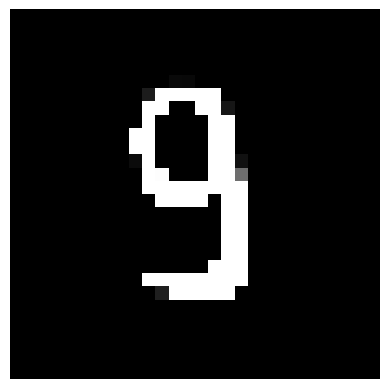

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [27]:
displaynum(img9)

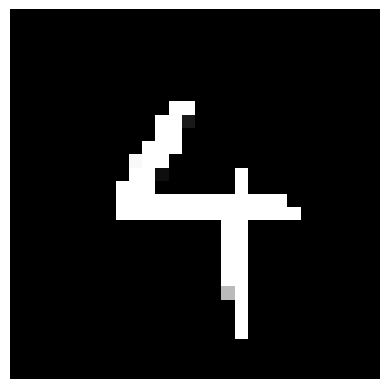

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [28]:
displaynum(img4)

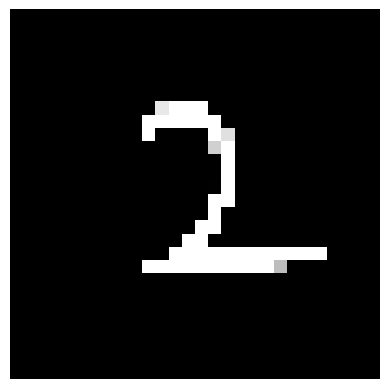

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [29]:
displaynum(img2)

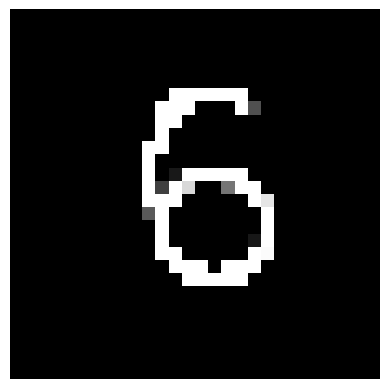

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [30]:
displaynum(img6)